# Training set size trend

In [124]:
import pandas as pd

training_sizes = [100,90,80,70,60,50,40,30,20,10]
dfs = {}

# load results from res.csv in each experiment
for size in training_sizes:
    dfs[size] = pd.read_csv(f"{str(size)}/res.csv")

In [125]:
# get the clustering results with 0 epsilon
for size in training_sizes:
    print(f"Results for {size} training size")
    dfs[size] = dfs[size][dfs[size]['approach'] == "clustering"]
    print(dfs[size].to_string(index=False))
    print("\n")

Results for 100 training size
  approach     packer  samples_num  unknown_rate  false_positive_rate  precision  recall  f1_score  accuracy  avg_num_instances
clustering   kkrunchy       1435.0           0.0               0.0001       1.00    0.99      1.00      1.00             116.60
clustering     mpress       1435.0           0.0               0.0018       0.99    0.98      0.98      1.00             121.34
clustering   obsidium       1435.0           0.0               0.0031       0.98    0.98      0.98      0.99             133.77
clustering  pecompact       1434.0           0.0               0.0012       0.99    1.00      0.99      1.00             119.24
clustering     pelock       1435.0           0.0               0.0002       1.00    0.96      0.98      1.00             136.56
clustering     petite       1434.0           0.0               0.0001       1.00    0.99      0.99      1.00             118.18
clustering     telock       1432.0           0.0               0.0107     

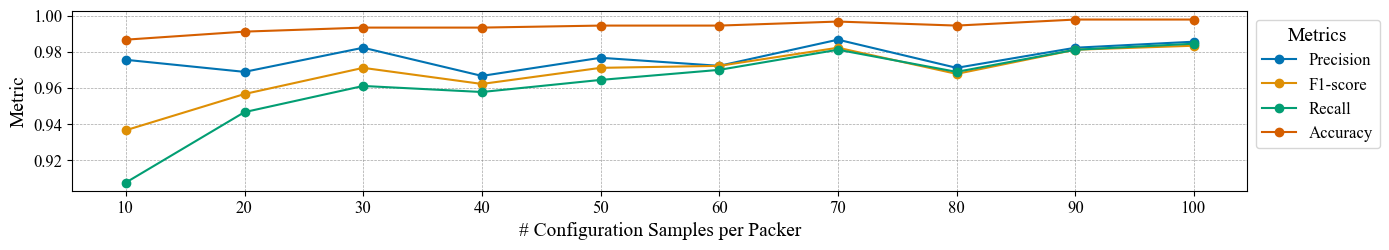

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Times New Roman"

plt_names = {'precision': 'Precision', 'recall': 'Recall', 'f1_score': 'F1-score', 'accuracy': 'Accuracy', 'false_positive_rate': 'FPR', 'unknown_rate': 'Unknown Rate'}
metrics = {'precision': [], 'f1_score': [], 'recall': [], 'accuracy': []}

# Extract data from each dataframe
for metric in metrics.keys():
    for size in training_sizes:
        metrics[metric].append(dfs[size][metric].mean())

# Create the figure
fig, ax = plt.subplots(figsize=(14, 2.6))

color_palette = sns.color_palette("colorblind", len(metrics.keys()))

# Plot each metric on the same subplot
for i, metric in enumerate(metrics.keys()):
    ax.plot(training_sizes, metrics[metric], label=plt_names[metric], marker='o', color=color_palette[i], linestyle='-', linewidth=1.5)

# Customize the plot
ax.set_xlabel('# Configuration Samples per Packer', fontsize=14)
ax.set_ylabel('Metric', fontsize=14)  # General label for all metrics
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
ax.tick_params(labelsize=12)

# Add legend
ax.legend(title='Metrics', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, title_fontsize=14)  # Adjust legend position as needed 

# Improve spacing between subplots (optional)
plt.xticks([i for i in range(10, 110, 10)])
plt.tight_layout()

plt.savefig('', format='pdf')  # Uncomment to save the figure

# Show the plot
plt.show()

0.418888888888889


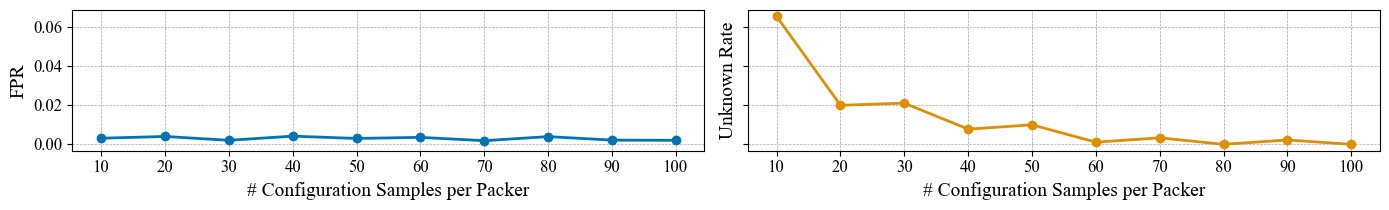

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Times New Roman"

metrics = {'false_positive_rate': [], 'unknown_rate': []}

# Extract data from each dataframe
for metric in metrics.keys():
    for size in training_sizes:
        metrics[metric].append(dfs[size][metric].mean())

print(max(metrics['false_positive_rate'])*100)

# Adjust number of rows and columns based on the number of metrics
num_metrics = len(metrics)
rows = int(np.ceil(num_metrics / 2))  # Use numpy.ceil to handle odd number of metrics
cols = 2  # Adjust columns as needed

# Create the figure with a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 2.2), sharey=True)  # Adjust figsize based on number of metrics

# Flatten the axes for easier iteration (if using more than 2 columns)
if cols > 2:
    axes = axes.flatten()

color_palette = sns.color_palette("colorblind", len(metrics.keys()))

# Plot each metric on a separate subplot
for i, metric in enumerate(metrics.keys()):
    # Handle cases where metrics exceed available subplots
    if i >= num_metrics:
        continue  # Skip plotting if no more subplots are available
    
    # Access the current subplot using indexing
    ax = axes[i]  # Assuming 2 columns (adjust for more columns)
    ax.plot(training_sizes, metrics[metric], label=metric, marker='o', color=color_palette[i], linestyle='-', linewidth=2)
    ax.set_xlabel('# Configuration Samples per Packer', fontsize=14)
    ax.set_ylabel(plt_names[metric], fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)  # Customize grid
    ax.tick_params(labelsize=12)  # Set both x and y tick labels size
    ax.set_xticks([i for i in range(10, 110, 10)])

# Improve spacing between subplots (optional)
plt.tight_layout()

plt.savefig('', format='pdf')  # Uncomment to save the figure

# Show the plot
plt.show()

In [128]:
# rename columns of dfs[100] with plt_names = {'precision': 'Precision', 'recall': 'Recall', 'f1_score': 'F1-score', 'accuracy': 'Accuracy', 'false_positive_rate': 'FPR', 'unknown_rate': 'Unknown Rate', 'avg_num_instances': 'Average number Inference Calls'}
plt_names = {'samples_num':'Test Size','packer': 'Packer', 'precision': 'Precision', 'recall': 'Recall', 'f1_score': 'F1-score', 'accuracy': 'Accuracy', 'false_positive_rate': 'FPR', 'unknown_rate': 'Unknown Rate', 'avg_num_instances': 'Average number Inference Calls'}
dfs[10].rename(columns=plt_names, inplace=True)

# Rename occurrences of 'themida-v2' in 'themida'
dfs[10]['Packer'] = dfs[10]['Packer'].replace('themida-v2', 'themida')
dfs[10]['Test Size'] = dfs[10]['Test Size'].astype(int)
# print in latex style well indtented
dfs[10] = dfs[10].loc[:, dfs[10].columns != 'approach']

print(dfs[10].to_latex(index=False))

# print average values
print(round(dfs[10].mean(),3).to_string())

\begin{tabular}{lrrrrrrrr}
\toprule
   Packer &  Test Size &  Unknown Rate &    FPR &  Precision &  Recall &  F1-score &  Accuracy &  Average number Inference Calls \\
\midrule
 kkrunchy &       1435 &          0.00 & 0.0110 &       0.92 &    0.99 &      0.95 &      0.99 &                           24.00 \\
   mpress &       1435 &          0.04 & 0.0033 &       0.97 &    0.94 &      0.95 &      0.99 &                           24.20 \\
 obsidium &       1435 &          0.05 & 0.0048 &       0.96 &    0.93 &      0.95 &      0.99 &                           24.60 \\
pecompact &       1434 &          0.01 & 0.0043 &       0.97 &    0.98 &      0.97 &      0.99 &                           23.96 \\
   pelock &       1435 &          0.20 & 0.0006 &       0.99 &    0.74 &      0.85 &      0.97 &                           23.74 \\
   petite &       1434 &          0.01 & 0.0005 &       1.00 &    0.99 &      0.99 &      1.00 &                           23.88 \\
   telock &       1432 &       

/tmp/ipykernel_7974/4289214215.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dfs[10].to_latex(index=False))
/tmp/ipykernel_7974/4289214215.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(round(dfs[10].mean(),3).to_string())
